# Batch Regression models

Authors: Romain Bernard, Vincent Tchoumba, Guillaume Philippe

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Define ticker
SP500 = "^GSPC"
CAC40 = "^FCHI"
Nikkei225 = "^N225"

# Recover Data
SP500_ticker = yf.Ticker(SP500)
CAC40_ticker = yf.Ticker(CAC40)
Nikkei225_ticker = yf.Ticker(Nikkei225)

# Recover prices
SP500_data = SP500_ticker.history(period="5Y")
CAC40_data = CAC40_ticker.history(period="5Y")
Nikkei225_data = Nikkei225_ticker.history(period="5Y")

In [3]:
SP500_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-29 00:00:00-05:00,2689.149902,2692.120117,2673.610107,2673.610107,2447760000,0.0,0.0
2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0.0,0.0
2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0.0,0.0
2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0.0,0.0
2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0.0,0.0


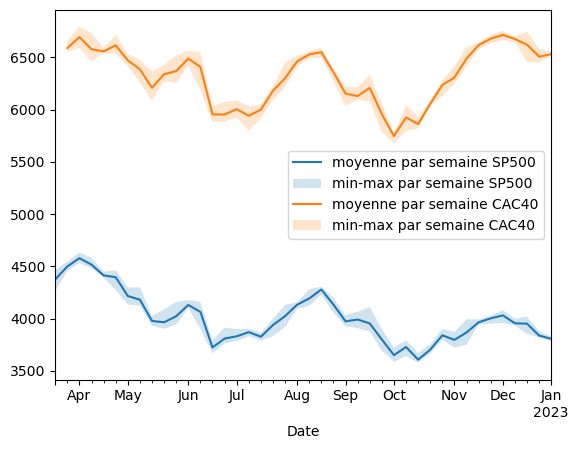

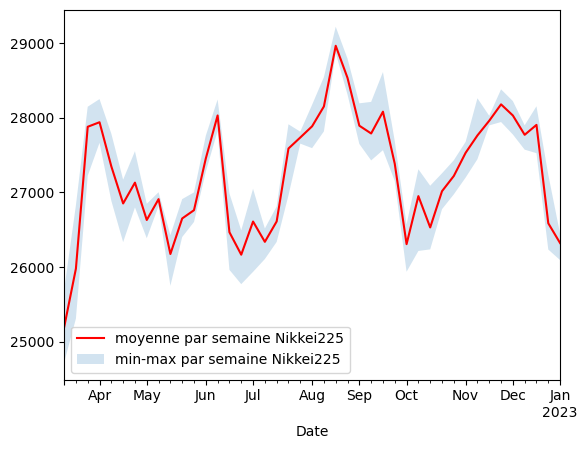

In [4]:
SP = SP500_data["Close"][-200:].resample("W").agg(["mean", "std", "min", "max"])
CAC = CAC40_data["Close"][-200:].resample("W").agg(["mean", "std", "min", "max"])
Nikkei = Nikkei225_data["Close"][-200:].resample("W").agg(["mean", "std", "min", "max"])

plt.figure()
SP["mean"].plot(label="moyenne par semaine SP500")
plt.fill_between(
    SP.index, SP["max"], SP["min"], alpha=0.2, label="min-max par semaine SP500"
)

CAC["mean"].plot(label="moyenne par semaine CAC40")
plt.fill_between(
    CAC.index, CAC["max"], CAC["min"], alpha=0.2, label="min-max par semaine CAC40"
)
plt.legend()

plt.figure()
Nikkei["mean"].plot(label="moyenne par semaine Nikkei225", c="r")
plt.fill_between(
    Nikkei.index,
    Nikkei["max"],
    Nikkei["min"],
    alpha=0.2,
    label="min-max par semaine Nikkei225",
)
plt.legend()

plt.show()

# Rolling Linear Regression based on the 'Close' of previous days

In [5]:
num = 20


def feature_engineering_RollingLR(data, num):
    new_data = data.copy()
    new_data = new_data.drop(
        columns=["High", "Low", "Open", "Volume", "Dividends", "Stock Splits"]
    )
    for i in range(1, num):
        new_data[f"Jour J-{i}"] = new_data["Close"].shift(i)

    new_data["label"] = new_data["Close"].shift(-1)
    new_data.dropna(axis=0, inplace=True)

    return new_data

In [6]:
SP500_shaped = feature_engineering_RollingLR(SP500_data, num)
CAC40_shaped = feature_engineering_RollingLR(CAC40_data, num)
Nikkei225_shaped = feature_engineering_RollingLR(Nikkei225_data, num)

In [7]:
SP500_shaped.head(12)

,Close,Jour J-1,Jour J-2,Jour J-3,Jour J-4,Jour J-5,Jour J-6,Jour J-7,Jour J-8,Jour J-9,...,Jour J-11,Jour J-12,Jour J-13,Jour J-14,Jour J-15,Jour J-16,Jour J-17,Jour J-18,Jour J-19,label
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-29 00:00:00-05:00,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,2776.419922,...,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2695.810059,2673.610107,2822.429932
2018-01-30 00:00:00-05:00,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,...,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2695.810059,2823.810059
2018-01-31 00:00:00-05:00,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,...,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2821.979980
2018-02-01 00:00:00-05:00,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,...,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2762.129883
2018-02-02 00:00:00-05:00,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,...,2798.030029,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2648.939941
2018-02-05 00:00:00-05:00,2648.939941,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,...,2810.300049,2798.030029,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2695.139893
2018-02-06 00:00:00-05:00,2695.139893,2648.939941,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,...,2832.969971,2810.300049,2798.030029,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2681.659912
2018-02-07 00:00:00-05:00,2681.659912,2695.139893,2648.939941,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,...,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2581.000000
2018-02-08 00:00:00-05:00,2581.000000,2681.659912,2695.139893,2648.939941,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,...,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,2776.419922,2786.239990,2767.560059,2619.550049


In [8]:
target_SP500 = SP500_shaped["label"]
data_SP500 = SP500_shaped.drop(columns="label")

target_CAC40 = CAC40_shaped["label"]
data_CAC40 = CAC40_shaped.drop(columns="label")

target_Nikkei225 = Nikkei225_shaped["label"]
data_Nikkei225 = Nikkei225_shaped.drop(columns="label")

In [9]:
X_train_SP, X_test_SP = data_SP500[:-200], data_SP500[-200:]
y_train_SP, y_test_SP = target_SP500[:-200], target_SP500[-200:]

X_train_CAC, X_test_CAC = data_CAC40[:-200], data_CAC40[-200:]
y_train_CAC, y_test_CAC = target_CAC40[:-200], target_CAC40[-200:]

X_train_Nikkei, X_test_Nikkei = data_Nikkei225[:-200], data_Nikkei225[-200:]
y_train_Nikkei, y_test_Nikkei = target_Nikkei225[:-200], target_Nikkei225[-200:]

In [10]:
from sklearn.linear_model import LinearRegression

lr_SP = LinearRegression()
lr_SP.fit(X_train_SP, y_train_SP)

lr_CAC = LinearRegression()
lr_CAC.fit(X_train_CAC, y_train_CAC)

lr_Nikkei = LinearRegression()
lr_Nikkei.fit(X_train_Nikkei, y_train_Nikkei)

print("R^2 SP500 :", lr_SP.score(X_test_SP, y_test_SP))
print("R^2 CAC40 : ", lr_CAC.score(X_test_CAC, y_test_CAC))
print("R^2 Nikkei225 : ", lr_Nikkei.score(X_test_Nikkei, y_test_Nikkei))

R^2 SP500 : 0.9314509803158174
R^2 CAC40 :  0.9204964854443921
R^2 Nikkei225 :  0.828513169700986


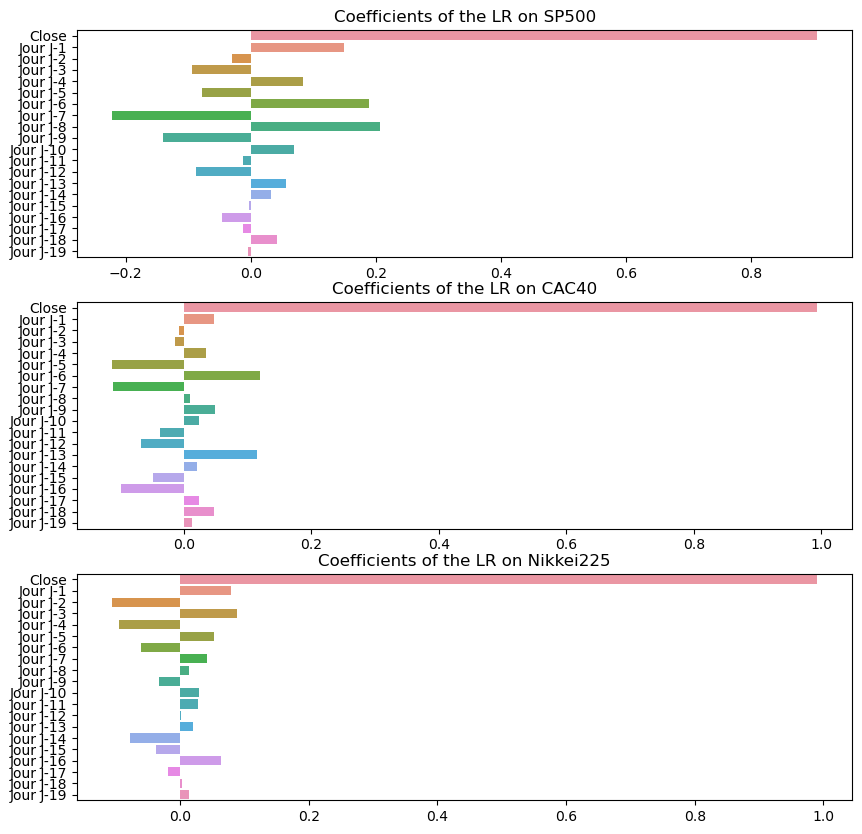

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title("Coefficients of the LR on SP500")
sns.barplot(x=lr_SP.coef_.flatten(), y=data_SP500.columns)

plt.subplot(3, 1, 2)
plt.title("Coefficients of the LR on CAC40")
sns.barplot(x=lr_CAC.coef_.flatten(), y=data_CAC40.columns)

plt.subplot(3, 1, 3)
plt.title("Coefficients of the LR on Nikkei225")
sns.barplot(x=lr_Nikkei.coef_.flatten(), y=data_Nikkei225.columns)

plt.show()

In [12]:
predictions_SP = lr_SP.predict(X_test_SP)

predictions_SP = pd.DataFrame(
    predictions_SP, columns=["predictions"], index=y_test_SP.index
)
targets_SP = pd.DataFrame(y_test_SP)
comparisons_SP = pd.concat([predictions_SP, targets_SP], axis=1)


predictions_CAC = lr_CAC.predict(X_test_CAC)

predictions_CAC = pd.DataFrame(
    predictions_CAC, columns=["predictions"], index=y_test_CAC.index
)
targets_CAC = pd.DataFrame(y_test_CAC)
comparisons_CAC = pd.concat([predictions_CAC, targets_CAC], axis=1)


predictions_Nikkei = lr_Nikkei.predict(X_test_Nikkei)

predictions_Nikkei = pd.DataFrame(
    predictions_Nikkei, columns=["predictions"], index=y_test_Nikkei.index
)
targets_Nikkei = pd.DataFrame(y_test_Nikkei)
comparisons_Nikkei = pd.concat([predictions_Nikkei, targets_Nikkei], axis=1)

In [13]:
comparisons_SP

,predictions,label
Date,,
2022-03-14 00:00:00-04:00,4181.223732,4262.450195
2022-03-15 00:00:00-04:00,4230.406603,4357.859863
2022-03-16 00:00:00-04:00,4358.560885,4411.669922
2022-03-17 00:00:00-04:00,4432.975510,4463.120117
2022-03-18 00:00:00-04:00,4445.223586,4461.180176
...,...,...
2022-12-20 00:00:00-05:00,3837.928103,3878.439941
2022-12-21 00:00:00-05:00,3878.540787,3822.389893
2022-12-22 00:00:00-05:00,3842.975033,3844.820068


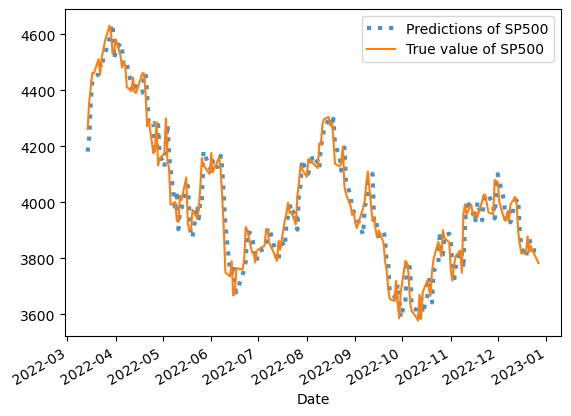

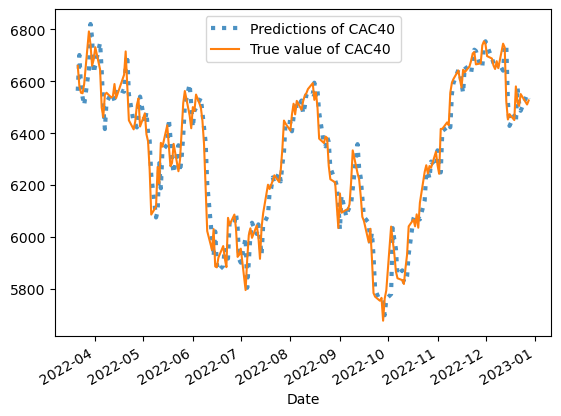

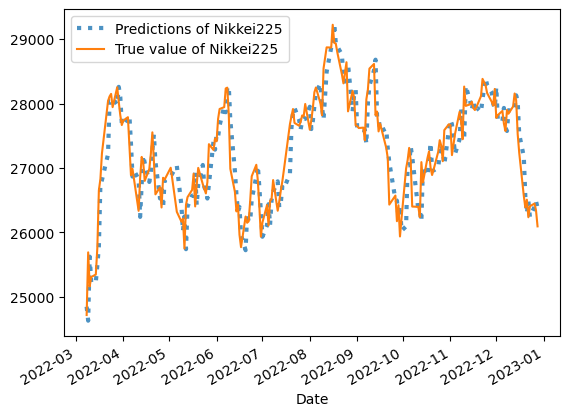

In [14]:
plt.figure()
comparisons_SP["predictions"].plot(
    label="Predictions of SP500", lw=3, ls=":", alpha=0.8
)
comparisons_SP["label"].plot(label="True value of SP500")
plt.legend()
plt.show()

plt.figure()
comparisons_CAC["predictions"].plot(
    label="Predictions of CAC40", lw=3, ls=":", alpha=0.8
)
comparisons_CAC["label"].plot(label="True value of CAC40")
plt.legend()
plt.show()

plt.figure()
comparisons_Nikkei["predictions"].plot(
    label="Predictions of Nikkei225", lw=3, ls=":", alpha=0.8
)
comparisons_Nikkei["label"].plot(label="True value of Nikkei225")
plt.legend()
plt.show()

In [15]:
# Mean absolute errors
from sklearn.metrics import mean_absolute_error

print("Mean absolute error SP500 : ", mean_absolute_error(predictions_SP, targets_SP))
print("Mean absolute error CAC40 : ", mean_absolute_error(predictions_CAC, targets_CAC))
print(
    "Mean absolute error Nikkei225 : ",
    mean_absolute_error(predictions_Nikkei, targets_Nikkei),
)

Mean absolute error SP500 :  51.20178791699796
Mean absolute error CAC40 :  61.25957724302189
Mean absolute error Nikkei225 :  263.8261889485524


# Idee --> Faire de la classification: 0 quand indice baisse 1 quand indice augmente

In [18]:
SP500_shaped["new_label"] = (SP500_shaped["label"] > SP500_shaped["Close"]).astype(int)

In [19]:
SP500_shaped.head()

,Close,Jour J-1,Jour J-2,Jour J-3,Jour J-4,Jour J-5,Jour J-6,Jour J-7,Jour J-8,Jour J-9,...,Jour J-12,Jour J-13,Jour J-14,Jour J-15,Jour J-16,Jour J-17,Jour J-18,Jour J-19,label,new_label
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-29 00:00:00-05:00,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,2776.419922,...,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2695.810059,2673.610107,2822.429932,0
2018-01-30 00:00:00-05:00,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,2802.560059,...,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2695.810059,2823.810059,1
2018-01-31 00:00:00-05:00,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,2798.030029,...,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2713.060059,2821.979980,0
2018-02-01 00:00:00-05:00,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,2810.300049,...,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2723.989990,2762.129883,0
2018-02-02 00:00:00-05:00,2762.129883,2821.979980,2823.810059,2822.429932,2853.530029,2872.870117,2839.250000,2837.540039,2839.129883,2832.969971,...,2802.560059,2776.419922,2786.239990,2767.560059,2748.229980,2751.290039,2747.709961,2743.149902,2648.939941,0


In [20]:
target_SP500 = SP500_shaped["new_label"]
data_SP500 = SP500_shaped.drop(columns=["label", "new_label"])

In [21]:
X_train_SP, X_test_SP = data_SP500[:-200], data_SP500[-200:]
y_train_SP, y_test_SP = target_SP500[:-200], target_SP500[-200:]

C:\Users\romai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


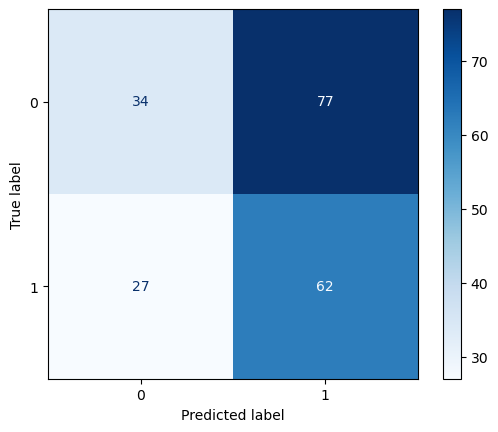

              precision    recall  f1-score   support

           0       0.56      0.31      0.40       111
           1       0.45      0.70      0.54        89

    accuracy                           0.48       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.51      0.48      0.46       200



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

logreg_SP = LogisticRegression()
logreg_SP.fit(X_train_SP, y_train_SP)

predictions_SP = logreg_SP.predict(X_test_SP)

cm = confusion_matrix(y_test_SP, predictions_SP)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.show()

print(classification_report(y_test_SP, predictions_SP))

In [23]:
predictions_proba_SP = logreg_SP.predict_proba(X_test_SP)

In [24]:
increase = predictions_proba_SP[:, 1][y_test_SP == 1]
decrease = predictions_proba_SP[:, 1][y_test_SP == 0]

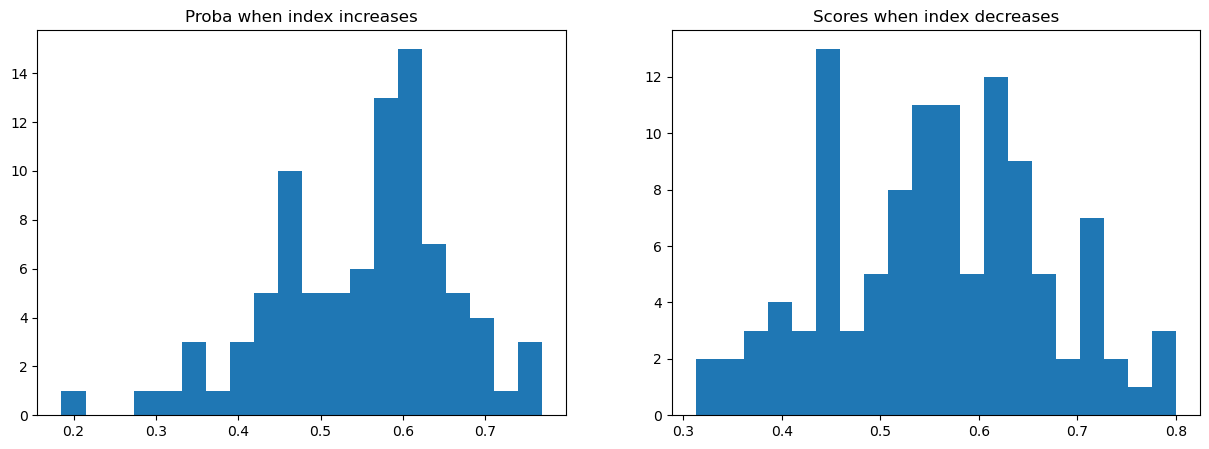

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Proba when index increases")
plt.hist(increase, bins=20)
plt.subplot(122)
plt.title("Scores when index decreases")
plt.hist(decrease, bins=20)
plt.show()

Looks almost impossible to separe with linear model